# Importing Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing dataframes

In [3]:
# Creating a path variable
path = r'C:\Users\Aaron\CareerFoundry\Instacart Basket Analysis'

In [4]:
# Importing latest version of ords_prods_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_TASK48UPDATE.pkl'))

In [5]:
# Checking our dataframe
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spending_flag,median_since_prior_orders,order_frequency_flag
0,2539329.0,1.0,1.0,2.0,8.0,11.0,196,1.0,0.0,both,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,...,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,...,Mid-range product,Regularly busy,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,...,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,...,Mid-range product,Least busy,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer


# Creating Bar Charts

Creating bar charts in a dataframe follows a similar procedure to that of printing the frequency for a specific column (.value_counts()). The only difference is that the resuts will be visual rather than just a table of values.

<AxesSubplot:>

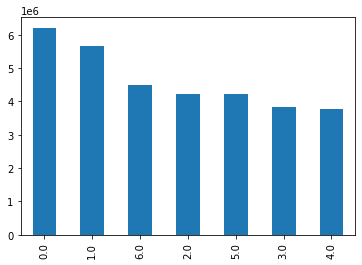

In [6]:
# example using orders_day_of_week column bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

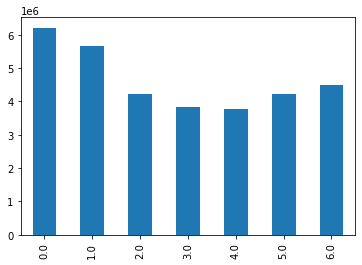

In [7]:
# Same bar chart but with sort_index()
# Now it's in order of the day of the week!!
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

### sort_index() can also be used when printing frequencies of the df as well

In [8]:
# Example without sort_index:
# Notice that they are in order of largest to smallest
ords_prods_merge['orders_day_of_week'].value_counts()

0.0    6209808
1.0    5665951
6.0    4500391
2.0    4217868
5.0    4209603
3.0    3844175
4.0    3787263
Name: orders_day_of_week, dtype: int64

In [9]:
# Example with sort_index()
# Notice that they are in order of the day of week
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0.0    6209808
1.0    5665951
2.0    4217868
3.0    3844175
4.0    3787263
5.0    4209603
6.0    4500391
Name: orders_day_of_week, dtype: int64

### Adding color to our bar chart

<AxesSubplot:>

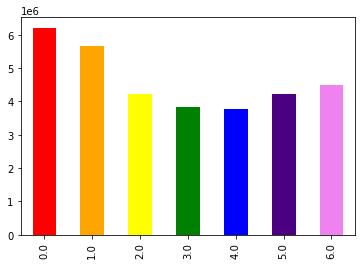

In [10]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

# Exporting Charts

In order to save charts, you must assign them to a variable

Once saved to a variable, you can access the chart using bar.figure

You can also use that to export the bar.figure with the addition of figure.savefig() function

Example below

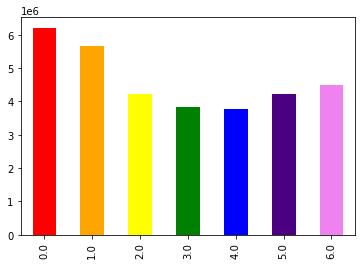

In [11]:
# Saving the visualization into Jupyter's memory by assigning it to a variable
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

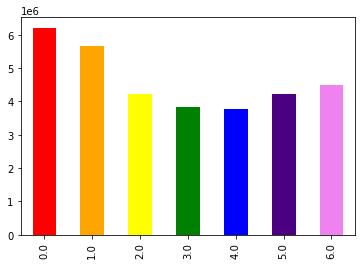

In [12]:
# Recalling the variable using bar.figure
bar.figure

### Exporting the bar chart

In [13]:
# Exporting the visualization
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

### Histograms

Histograms are used to show the density of a continuous variable - the distribution of observations per their occurence in a data set.

Bar charts are good for categorical data (like shown in above example), while histograms are more appropriate for continuous data.

We can create histograms using the .plot.hist(). *** NO NEED FOR .value_counts()

<AxesSubplot:ylabel='Frequency'>

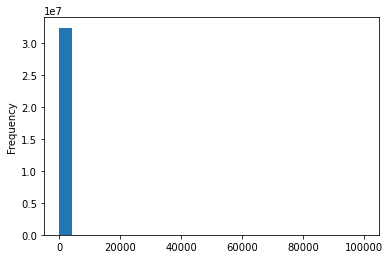

In [14]:
# Example of histogram using the prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

Histogram above seems to be wrong. We should've gotten 25 bars (one for each bin). Must be due to the data prep stage.

In [15]:
# Checking the dataframe
ords_prods_merge['prices'].describe()

count    3.240487e+07
mean     1.198022e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Maximum value looks odd. Let's further investigate.

In [16]:
# Finding mean
ords_prods_merge['prices'].mean()

11.980224398453556

In [17]:
# Finding median
ords_prods_merge['prices'].median()

7.4

In [18]:
# Finding max
ords_prods_merge['prices'].max()

99999.0

Max price of $99,999 looks odd. That's too high for groceries!

### Creating Scatter Plots

Normally, scatterplots are used to investigate the relationship between 2 variables.

However, when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers.

To do so, we can use the code:
##### sns.scatterplot(x = 'COLUMN_NAME', y = 'COLUMN_NAME', data = THE_NAME_OF_DATAFRAME_WHERE_DATA_COMES_FROM)
sns = seaborn library code (remember when we import libraries, we put seaborn as sns)

.scatterplot() is the function to create scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

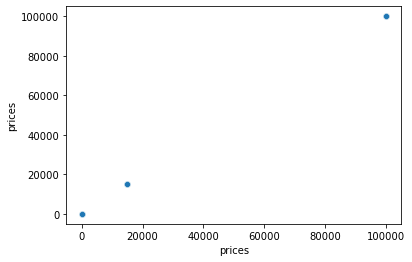

In [19]:
# Example of scatter plot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

Mean of prices is around 12 (found from Output [15]). Because of this, we'd expect the prices to be around that value.

However, we can see that 2 points are far beyond the expected spots, one near 20,000 and the other near 100,000

Let's run more exploratory checks on the data

In [21]:
# Let's find out if there are any values above a certain threshold, anything above "normal" supermarket price
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spending_flag,median_since_prior_orders,order_frequency_flag
10030345,912404.0,17.0,12.0,2.0,14.0,5.0,21553,5.0,0.0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,High-range product,Regularly busy,Regularly busy,Most orders,40.0,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376.0,17.0,22.0,6.0,16.0,4.0,21553,3.0,1.0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,High-range product,Regularly busy,Regularly busy,Most orders,40.0,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360.0,135.0,2.0,2.0,21.0,13.0,21553,6.0,0.0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,High-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,1154.792308,High spender,11.5,Regular customer
10030348,892534.0,135.0,3.0,0.0,8.0,12.0,21553,3.0,1.0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,High-range product,Busiest day,Busiest days,Average orders,4.0,New customer,1154.792308,High spender,11.5,Regular customer
10030349,229704.0,342.0,8.0,1.0,19.0,30.0,21553,9.0,0.0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,High-range product,Regularly busy,Busiest days,Average orders,16.0,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29194168,2249946.0,204099.0,29.0,0.0,8.0,4.0,33664,1.0,0.0,both,2 % Reduced Fat Milk,84.0,16.0,99999.0,High-range product,Busiest day,Busiest days,Average orders,39.0,Regular customer,1106.743956,High spender,4.0,Frequent customer
29194169,2363282.0,204099.0,31.0,0.0,9.0,2.0,33664,1.0,1.0,both,2 % Reduced Fat Milk,84.0,16.0,99999.0,High-range product,Busiest day,Busiest days,Most orders,39.0,Regular customer,1106.743956,High spender,4.0,Frequent customer
29194170,3181945.0,204395.0,13.0,3.0,15.0,8.0,33664,25.0,0.0,both,2 % Reduced Fat Milk,84.0,16.0,99999.0,High-range product,Regularly busy,Slowest days,Most orders,15.0,Regular customer,451.153540,High spender,5.0,Frequent customer
29194171,2486215.0,205227.0,7.0,3.0,20.0,4.0,33664,8.0,0.0,both,2 % Reduced Fat Milk,84.0,16.0,99999.0,High-range product,Regularly busy,Slowest days,Average orders,12.0,Regular customer,1178.381871,High spender,11.0,Regular customer


In [20]:
# Original display didn't show us all of the columns. Wanted to change it to show all columns.
pd.options.display.max_columns = None

We can see that there are 5,127 items that are greater than 100

Additionally, we can see the 2 prices greater than 100 are: 14,900 and 99,999

##### For now, let's mark these high prices as missing since they don't make sense in terms of how high they are compared to the rest of the values in the prices column.

In [22]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

###### Now we check the max price in the prices column to see what it is now that we've replaced the 14,900 and 99,999 values

In [23]:
ords_prods_merge['prices'].max()

25.0

Logically, a max value of 25 dollars in a grocery store makes more sense than a value of 14,900 or 99,999 dollars

#### After finishing the ad-hoc data cleaning, let's retry the histogram

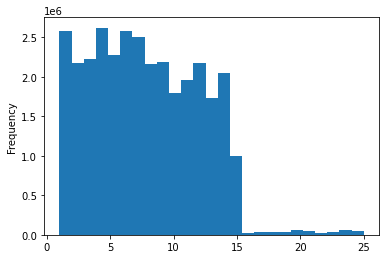

In [24]:
# In order to save the histogram, we must assign it to a variable as well
# Just like what we did with the bar chart
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

##### Increasing the number of bins to 70 to increase the level of granularity in the histogram

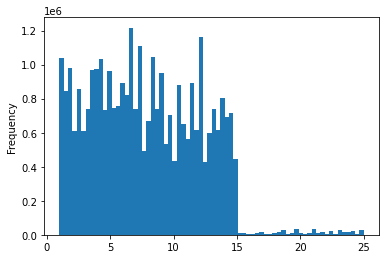

In [25]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

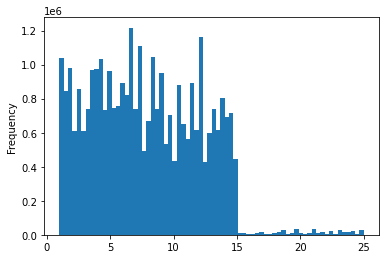

In [26]:
# Recalling the histogram
hist_2.figure

### Exporting histogram

In [27]:
# Saving hist.figure
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices.png'))

In [28]:
# Saving hist_2.figure
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices_2.png'))

#  Creating Line Charts

Line Charts are traditionally used to visualize the development of a characteristic over time.

Since we don't have dates, we'll test it out on the development of the prices column across the days of the week

We will use a subset of the dataframe to do so

In [29]:
df = ords_prods_merge[:2000000]

In [30]:
# Checking the shape of the subset df
df.shape

(2000000, 24)

Does this work? Not really since it's the first 2,000,000 rows and therefore it's not representative of the entire dataframe population.

So what do we do? We can create a random sample out of the population!

# Sampling Data

A sample is a representative subsection of a population.

#### Random floating number between 0 and 1.
Each row is assigned a number between 0 and 1 and the random number will dictate where the row will end up in regards to the split.

In [31]:
np.random.seed(4)

In [32]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In the first line:
"seed" represents a random but reproducible pattern, meaning Python will always give you the same set of random numbers (in this case, 4) rather than having to create a new pattern of numbers everytime I run the command.

Second line:
New list called "dev" was created. This is where the boolean values are STORED. We will be getting an output of True or False for every value in the df (or subset) based on whether it is less than or equal to 0.7.

np.random.rand() = this function is what will actually create our list of random floating numbers between 0 and 1
    
    "np" = numpy
    
    "random" = creates the random numbers
    
    "rand" = a function that ensures the random numbers generated by "random" follow the uniform distribution (an equal chance for every number bw 0 and 1 to occur in the distribution
    
    "len" = length, this produces a value that represents the lenght of whatever I put inside it. Since we put the dataframe inside it, it will produce 32,435,070 random numbers (ranging bw 0 and 1) since that's how many rows are in our dataframe
    
    <= 0.7 = a test to tell us True/False if the random value it produces is less than or equal to 0.7 

In [33]:
dev

array([False,  True, False, ...,  True,  True, False])

##### Example of np.random.rand with a smaller number

In [34]:
np.random.rand(10)

array([0.72334378, 0.45047541, 0.70648241, 0.253538  , 0.20542866,
       0.08812185, 0.60502834, 0.82712983, 0.47498599, 0.93206268])

See that it produces 10 numbers, all ranging between 0 and 1

#### Splitting the dataframe into 2 samples

What we'll be doing here is splitting the dev results from the dataframe into 2 samples. One sample containing 70% of the data (that are assigned a value less or equal to 0.7) and the other sample containing everything else not included in dev (~dev) (this is pretty much all False values, greater than 0.7)

In [35]:
# Storing 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [36]:
# Storing 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

#### Checking to see if our samples match the original

In [37]:
len(ords_prods_merge)

32435070

In [38]:
len(big) + len(small)

32435070

They match!

#### Reducing the samples to contain only the columns necessary for the chart

In [39]:
# Creating a new subset of the sample containing only necessary columns
df_2 = small[['orders_day_of_week', 'prices']]

#### Time to create the line chart

line = variable name assigned to our line chart

sns = seaborn

.lineplot = the function the creates line charts

data = name of dataframe that provides our values

x, y = axis column names

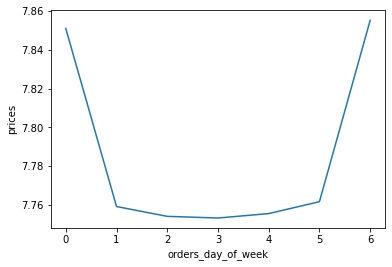

In [40]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

#### Checking to see if our line chart is accurate by comparing it with the line chart of the big sample (or even the entire dataframe if possible!)

In [41]:
# Creating new dataframe for big sample containing only the columns we need
df_3 = big[['orders_day_of_week', 'prices']]

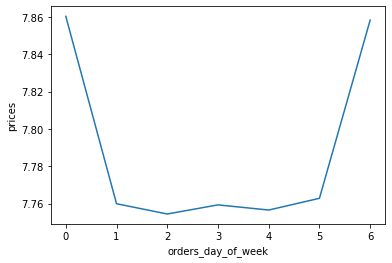

In [42]:
line_2 = sns.lineplot(data = df_3, x = 'orders_day_of_week', y = 'prices')

##### Slightly different but the trend remains the same! Sunday and Saturday remain to be the peak prices days.

## Exporting updated ords_prods_merge

In [44]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_TASK49UPDATE.pkl'))